In [66]:
import pandas as pd
loan_df = pd.read_csv('../raw_data/loan_data_2007_2014.csv')

/tmp/ipykernel_3134/3186153028.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('../raw_data/loan_data_2007_2014.csv')


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Duplicates and Correlation

In [3]:
# N of rows
import numpy as np

print(
    len(loan_df)
    , loan_df.duplicated().sum()
)

# No duplicated columns

466285 0


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = loan_df.corr()
# correlation_matrix

# column_names = correlation_matrix.columns
# sns.heatmap(correlation_matrix, cmap= "twilight_shifted", fmt = '.4g');

## Feature Selection and Imputing

In [5]:
# Counting the number of NaN for each column
#loan_df.isnull().sum().sort_values(ascending=False) 
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")

0% Missing Values on Column Unnamed: 0
0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
73% Missing Values on Column desc
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on C

In [18]:
# emp_title
# loan_df['emp_title'].unique()
print(
    loan_df['emp_title'].value_counts(dropna=False)
    , loan_df[loan_df['emp_title'].isna()].groupby('emp_length').size().reset_index(name='N')
)
# Tem muito emp_title NA que tem resposta no emp_length. Também não tem como encodar as classes de forma satisfatória. Então vamos usar o emp_length. DROP

NaN                                  27588
Teacher                               5399
Manager                               4438
Registered Nurse                      2316
RN                                    2204
                                     ...  
SEA Group, llc                           1
The Eastern Arizona AHEC                 1
Delaware Quarries.com                    1
McCauley trucking and warehousing        1
Server Engineer Lead                     1
Name: emp_title, Length: 205476, dtype: int64    emp_length     N
0      1 year   230
1   10+ years  2682
2     2 years   403
3     3 years   555
4     4 years   452
5     5 years   521
6     6 years   376
7     7 years   407
8     8 years   313
9     9 years   210
10   < 1 year   617


In [55]:
# emp_length
loan_df['emp_length'].value_counts(dropna = False)
# O que são os NAs? Desempregado?
# Encode -> emprego estável

# vendo a frequência de valores de annual_inc para os casos em que emp_length é NA:
# loan_df[loan_df['emp_length'].isna()].groupby('annual_inc').size().reset_index(name='N')

# Média de renda anual dos casos em que emp_length é NA
print(
    f'''
    Renda média dos casos com emp_length NA = {round(np.mean(loan_df[loan_df['emp_length'].isna()]['annual_inc']), 2)}
    Renda média das categorias de emp_length 
    {loan_df.groupby('emp_length')['annual_inc'].mean()}
    '''
)

# O NA tem uma renda anual bem menor que os outros (49k vs 68k) --> encode como indefinido/unemployed
# OU -> fazer categorias menos amplas




    Renda média dos casos com emp_length NA = 49428.98
    Renda média das categorias de emp_length 
    emp_length
1 year       69023.265835
10+ years    80190.099830
2 years      70951.243257
3 years      71749.489683
4 years      71573.293625
5 years      72330.766718
6 years      71982.835566
7 years      73108.203561
8 years      74064.827391
9 years      74385.958024
< 1 year     68301.848520
Name: annual_inc, dtype: float64
    


In [56]:
# Vendo a % de good e bad por categoria de emp_length
loan_df.groupby('emp_length', dropna = False)['good_bad'].value_counts(normalize=True)

# % muito mais alta nos NAs e no < 1 year

emp_length  good_bad
1 year      1           0.888124
            0           0.111876
10+ years   1           0.900353
            0           0.099647
2 years     1           0.890242
            0           0.109758
3 years     1           0.890480
            0           0.109520
4 years     1           0.890411
            0           0.109589
5 years     1           0.885033
            0           0.114967
6 years     1           0.882889
            0           0.117111
7 years     1           0.888655
            0           0.111345
8 years     1           0.889931
            0           0.110069
9 years     1           0.887914
            0           0.112086
< 1 year    1           0.881015
            0           0.118985
NaN         1           0.867384
            0           0.132616
Name: good_bad, dtype: float64

In [6]:
loan_df['desc'].unique()
# Coluna muito caótica. Dropar

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [7]:
loan_df['mths_since_last_delinq'].unique()
# O que significa o NA nessa coluna? Não tem descrição. Dropar.
# mths_since_last_record idem

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,
        94., 102., 129., 113., 139., 131., 156., 143., 109., 119., 149.,
       118., 130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92.,
       108., 133., 104., 111., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121.])

In [8]:
loan_df['next_pymnt_d'].unique() # Sem interpretação do que são os NAs

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [9]:
# Total collection amounts ever owed -> Tem 0 e tem NA. O zero significa NA? Incerto.
loan_df['tot_coll_amt'].unique()

array([   nan,     0., 15386., ..., 16125.,  9778.,  6532.])

In [10]:
# Total current balance of all accounts. 15% de NA. Variável boa, pq é uma medida do poder de pagamento.
loan_df['tot_cur_bal'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['tot_cur_bal'].mean()}\nMedian = {loan_df['tot_cur_bal'].median()}")

# Mediana talvez seja melhor

Mean = 138801.71338530185
Median = 81539.0


<AxesSubplot:>

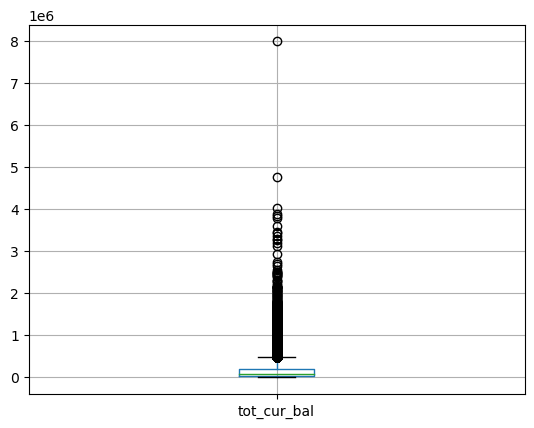

In [11]:
loan_df[['tot_cur_bal']].boxplot()
# Muito outlier -> Min/max?

In [12]:
# Total revolving high credit/ credit limit
loan_df['total_rev_hi_lim'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['total_rev_hi_lim'].mean()}\nMedian = {loan_df['total_rev_hi_lim'].median()}")

# 

Mean = 30379.087770732483
Median = 22800.0


In [13]:
loan_df[['total_rev_hi_lim']].boxplot()
# muito outlier. Min/Max

<AxesSubplot:>

In [16]:
loan_df[['tot_cur_bal', 'total_rev_hi_lim']].isnull().sum()

tot_cur_bal         0
total_rev_hi_lim    0
dtype: int64

In [69]:
# Fazer com pipe?
#### Faltando tratar emp_title e emp_length

# Imputer
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="median") 

# Call the "fit" method on the object
imputer.fit(loan_df[['tot_cur_bal', 'total_rev_hi_lim']]) 

# Call the "transform" method on the object
loan_df[['tot_cur_bal', 'total_rev_hi_lim']] = imputer.transform(loan_df[['tot_cur_bal', 'total_rev_hi_lim']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

array([81539., 22800.])

In [70]:
# Dropping features with very high percentage of missing values
loan_df.drop(columns = ['Unnamed: 0', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',       'annual_inc_joint', 'annual_inc_joint', 'dti_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'next_pymnt_d', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'policy_code']
             , inplace = True)


In [35]:
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")
    
# tot_col_amnt ainda não sabemos o q fazer com essa variável

0% Missing Values on Column Unnamed: 0
0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on Column delinq_2yrs
0% Missing Value

## Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data.good_bad

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
Xtest.shape

(93257, 207)

Preparation

In [ ]:
df_Xtrain_pre = Xtrain
df_ytrain_pre = ytrain
df_Xtrain_pre.grade.unique()

array(['B', 'A', 'E', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
grade_good_bad = pd.concat([df_Xtrain_pre['grade'], df_ytrain_pre], axis=1)

In [ ]:
grade_good_bad.sample(10)

,grade,good_bad
311196,A,1
438123,E,1
102428,C,1
392805,B,1
318203,C,1
324452,F,1
412370,D,1
238532,F,1
301542,E,1
149465,B,1


*To find a weight of evidence of grade, we must first find the proportion of good and bad
borrowers by grade.*

In [ ]:
grade_good_bad.groupby(grade_good_bad.columns.values[0], as_index=False)[grade_good_bad.columns.values[1]].count()

,grade,good_bad
0,A,59756
1,B,109561
2,C,100274
3,D,61518
4,E,28575
5,F,10661
6,G,2683


In [ ]:
#good_bad column has 1 and 0 the average calculates sum of only 1 
grade_good_bad.groupby(grade_good_bad.columns.values[0], as_index=False)[grade_good_bad.columns.values[1]].mean()

,grade,good_bad
0,A,0.961360
1,B,0.920912
2,C,0.886002
3,D,0.846029
4,E,0.803640
5,F,0.760623
6,G,0.717480


In [ ]:
df1 = pd.concat([grade_good_bad.groupby(grade_good_bad.columns.values[0], as_index=False)[grade_good_bad.columns.values[1]].count(), 
                 grade_good_bad.groupby(grade_good_bad.columns.values[0], as_index=False)[grade_good_bad.columns.values[1]].mean()],
               axis=1)
df1.head()

,grade,good_bad,grade,good_bad
0,A,59756,A,0.961360
1,B,109561,B,0.920912
2,C,100274,C,0.886002
3,D,61518,D,0.846029
4,E,28575,E,0.803640


In [ ]:
# taking out the second grade column
df1 = df1.iloc[:, [0,1,3]]
df1.head()

,grade,good_bad,good_bad
0,A,59756,0.961360
1,B,109561,0.920912
2,C,100274,0.886002
3,D,61518,0.846029
4,E,28575,0.803640


In [ ]:
# changing the names
df1.columns = [df1.columns[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59756,0.961360
1,B,109561,0.920912
2,C,100274,0.886002
3,D,61518,0.846029
4,E,28575,0.803640
5,F,10661,0.760623
6,G,2683,0.717480


In [ ]:
df1['prop_n_obs'] = df1.n_obs / df1.n_obs.sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59756,0.961360,0.160192
1,B,109561,0.920912,0.293707
2,C,100274,0.886002,0.268811
3,D,61518,0.846029,0.164915
4,E,28575,0.803640,0.076603
5,F,10661,0.760623,0.028580
6,G,2683,0.717480,0.007192


In [ ]:
df1['n_good'] = df1.n_obs * df1.prop_good
df1['n_bad'] = (1 - df1.prop_good) * df1.n_obs

In [ ]:
df1['prop_n_good'] = df1.n_good / df1.n_good.sum()
df1['prop_n_bad'] = df1.n_bad / df1.n_bad.sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59756,0.961360,0.160192,57447.0,2309.0,0.172913,0.056596
1,B,109561,0.920912,0.293707,100896.0,8665.0,0.303693,0.212388
2,C,100274,0.886002,0.268811,88843.0,11431.0,0.267414,0.280185
3,D,61518,0.846029,0.164915,52046.0,9472.0,0.156657,0.232168
4,E,28575,0.803640,0.076603,22964.0,5611.0,0.069121,0.137531
5,F,10661,0.760623,0.028580,8109.0,2552.0,0.024408,0.062552
6,G,2683,0.717480,0.007192,1925.0,758.0,0.005794,0.018579


In [ ]:
# Getting the weight of evidence
df1['woe'] = np.log(df1.prop_n_good / df1.prop_n_bad)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe
0,A,59756,0.961360,0.160192,57447.0,2309.0,0.172913,0.056596,1.116854
1,B,109561,0.920912,0.293707,100896.0,8665.0,0.303693,0.212388,0.357604
2,C,100274,0.886002,0.268811,88843.0,11431.0,0.267414,0.280185,-0.046653
3,D,61518,0.846029,0.164915,52046.0,9472.0,0.156657,0.232168,-0.393407
4,E,28575,0.803640,0.076603,22964.0,5611.0,0.069121,0.137531,-0.687996
5,F,10661,0.760623,0.028580,8109.0,2552.0,0.024408,0.062552,-0.941097
6,G,2683,0.717480,0.007192,1925.0,758.0,0.005794,0.018579,-1.165197


In [ ]:
df1 = df1.sort_values(['woe'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe
0,G,2683,0.717480,0.007192,1925.0,758.0,0.005794,0.018579,-1.165197
1,F,10661,0.760623,0.028580,8109.0,2552.0,0.024408,0.062552,-0.941097
2,E,28575,0.803640,0.076603,22964.0,5611.0,0.069121,0.137531,-0.687996
3,D,61518,0.846029,0.164915,52046.0,9472.0,0.156657,0.232168,-0.393407
4,C,100274,0.886002,0.268811,88843.0,11431.0,0.267414,0.280185,-0.046653
5,B,109561,0.920912,0.293707,100896.0,8665.0,0.303693,0.212388,0.357604
6,A,59756,0.961360,0.160192,57447.0,2309.0,0.172913,0.056596,1.116854


In [ ]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_woe'] = df1['woe'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe
0,G,2683,0.717480,0.007192,1925.0,758.0,0.005794,0.018579,-1.165197,NaN,NaN
1,F,10661,0.760623,0.028580,8109.0,2552.0,0.024408,0.062552,-0.941097,0.043142,0.224099
2,E,28575,0.803640,0.076603,22964.0,5611.0,0.069121,0.137531,-0.687996,0.043017,0.253102
3,D,61518,0.846029,0.164915,52046.0,9472.0,0.156657,0.232168,-0.393407,0.042389,0.294589
4,C,100274,0.886002,0.268811,88843.0,11431.0,0.267414,0.280185,-0.046653,0.039974,0.346754
5,B,109561,0.920912,0.293707,100896.0,8665.0,0.303693,0.212388,0.357604,0.034909,0.404257
6,A,59756,0.961360,0.160192,57447.0,2309.0,0.172913,0.056596,1.116854,0.040448,0.759250


In [ ]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['woe']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_prop_good,diff_woe,IV
0,G,2683,0.717480,0.007192,1925.0,758.0,0.005794,0.018579,-1.165197,NaN,NaN,0.290724
1,F,10661,0.760623,0.028580,8109.0,2552.0,0.024408,0.062552,-0.941097,0.043142,0.224099,0.290724
2,E,28575,0.803640,0.076603,22964.0,5611.0,0.069121,0.137531,-0.687996,0.043017,0.253102,0.290724
3,D,61518,0.846029,0.164915,52046.0,9472.0,0.156657,0.232168,-0.393407,0.042389,0.294589,0.290724
4,C,100274,0.886002,0.268811,88843.0,11431.0,0.267414,0.280185,-0.046653,0.039974,0.346754,0.290724
5,B,109561,0.920912,0.293707,100896.0,8665.0,0.303693,0.212388,0.357604,0.034909,0.404257,0.290724
6,A,59756,0.961360,0.160192,57447.0,2309.0,0.172913,0.056596,1.116854,0.040448,0.759250,0.290724


In [ ]:
def woe_discrete(df, col_X, y):
    df = pd.concat([df[col_X], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
df_woe = woe_discrete(df_Xtrain_pre, 'grade', df_ytrain_pre)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#matplotlib works better with np.arrays
def plot_by_woe(df, rotation_x = 0):
    x = np.array(df.iloc[:, 0].apply(str))
    y = np.array(df.iloc[:, 8])
    plt.figure(figsize= (18,6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of evidence by ' + df.columns[0]))
    plt.xticks(rotation = rotation_x)
    

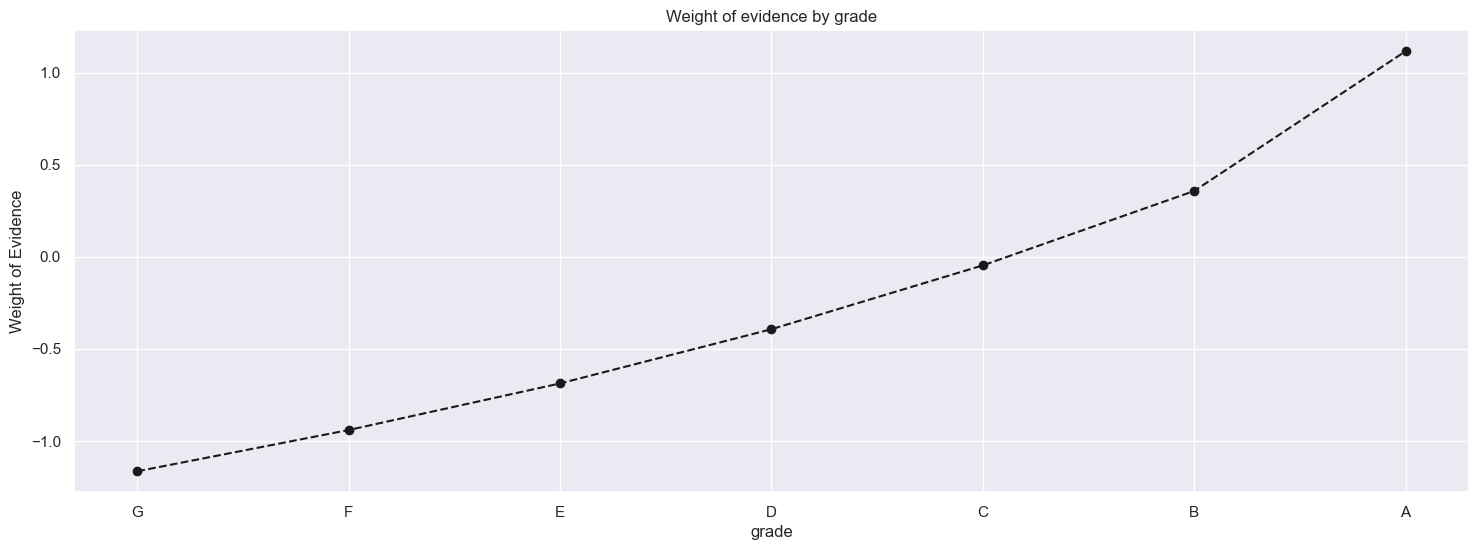

In [ ]:
plot_by_woe(df_woe)

### Ownership
#### Based on weight of evidence, we must decide how to organize the original categories of the discrete variables into dummy variables for the model.

*Processing discrete dummy category* \

Grade A - G: When we put these dummy variables into a regression model, we should keep one out as a reference category, the category against which the impact of all others on the outcome will be assessed. *G will be the reference category here*

In [ ]:
# home ownership dummies
df_temp = woe_discrete(df_Xtrain_pre, 'home_ownership', df_ytrain_pre)

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,141,0.765957,0.000378,108.0,33.0,0.000325,0.000809,-0.911571,NaN,NaN,inf
1,NONE,37,0.810811,0.000099,30.0,7.0,0.000090,0.000172,-0.641907,0.044853,0.269664,inf
2,RENT,150918,0.873613,0.404576,131844.0,19074.0,0.396846,0.467523,-0.163901,0.062803,0.478006,inf
3,OWN,33392,0.891800,0.089516,29779.0,3613.0,0.089634,0.088558,0.012071,0.018187,0.175972,inf
4,MORTGAGE,188539,0.904152,0.505429,170468.0,18071.0,0.513102,0.442938,0.147045,0.012352,0.134974,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.095848,inf,inf


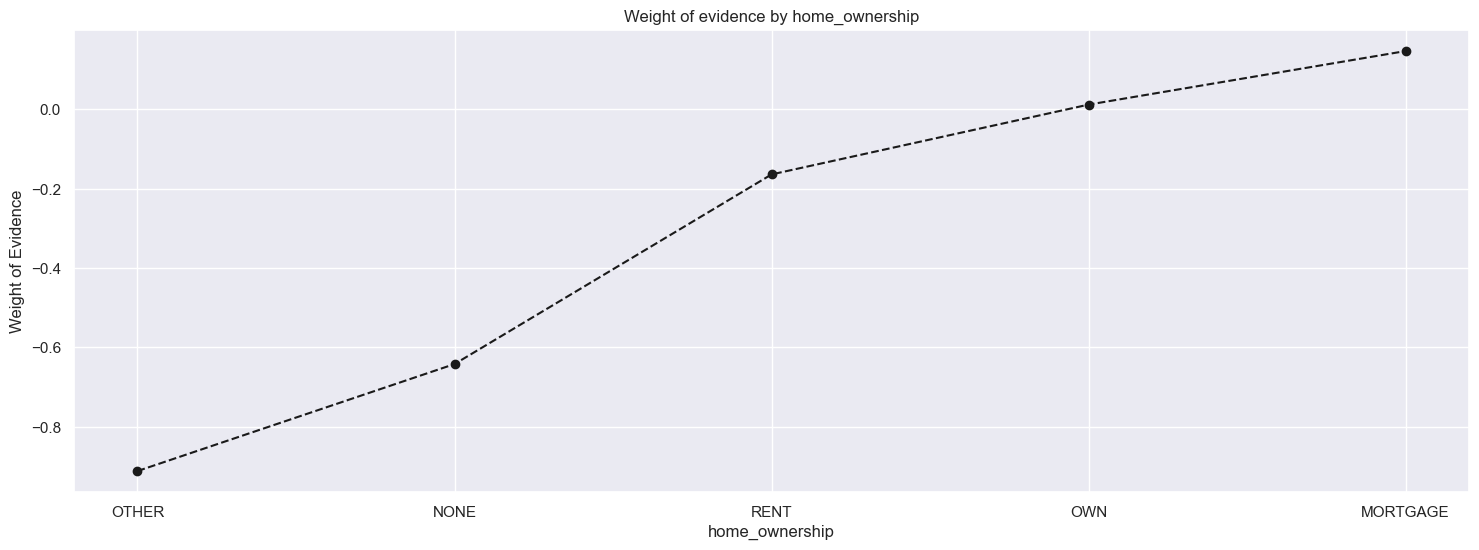

In [ ]:
plot_by_woe(df_temp)
df_temp

Few loans are associated with categories representing less than 0.1% each. The 'any', 'other' and 'rent' categories lack sufficient data for weight of evidence calculation, so dummy variables are not used. However, these categories are not removed to preserve customer information. Instead, underrepresented and similar categories are combined in preprocessing. \
Rent has most observations, thus we'll combine the other categories there.

From a set of categorical variables that represent one original independent variable, we make a reference category the category with the lowest WoE

In [ ]:
df_Xtrain_pre['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_Xtrain_pre['home_ownership: ANY'], df_Xtrain_pre['home_ownership: OWN'],
                                                         df_Xtrain_pre['home_ownership: RENT'], df_Xtrain_pre['home_ownership: OTHER']])

## Correlation

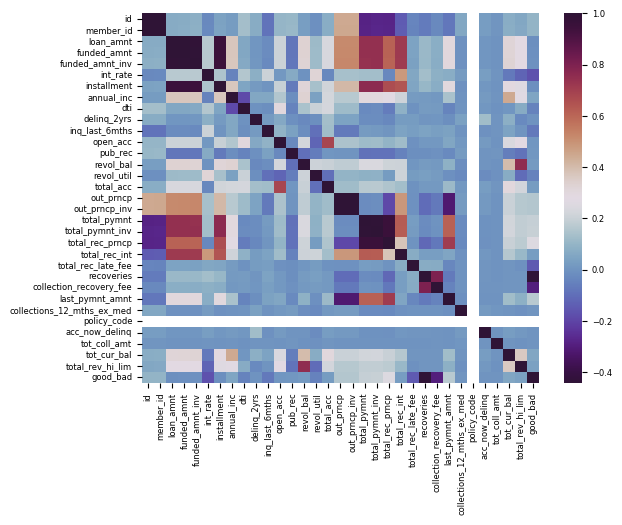

In [ ]:
# Heatmap of pairwise correlations
correlation_matrix = loan_df.corr()
correlation_matrix

column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, cmap= "twilight_shifted");

In [ ]:
correlation_matrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
id,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,0.072024,...,-0.066162,-0.030594,-0.078282,0.056528,NaN,0.026759,0.004007,0.074678,0.058137,0.095883
member_id,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,0.072536,...,-0.066358,-0.030748,-0.076851,0.056772,NaN,0.026981,0.004088,0.077141,0.059066,0.096759
loan_amnt,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,...,0.110691,0.077336,0.304243,-0.008067,NaN,0.006283,-0.002859,0.321577,0.276760,-0.011819
funded_amnt,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,...,0.110338,0.077190,0.304178,-0.007822,NaN,0.006472,-0.002859,0.323100,0.277737,-0.011003
funded_amnt_inv,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,0.008143,...,0.107944,0.073781,0.303105,-0.007175,NaN,0.006801,-0.002858,0.324673,0.278252,-0.007191
int_rate,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,0.079190,...,0.127893,0.082198,0.075609,0.020306,NaN,0.030338,0.000863,-0.071655,-0.126010,-0.172361
installment,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017001,...,0.105666,0.075344,0.299867,-0.006055,NaN,0.008923,-0.002359,0.293049,0.258528,-0.013936
annual_inc,0.024231,0.024921,0.370893,0.370311,0.367806,-0.046072,0.368145,1.000000,-0.188548,0.058896,...,0.016954,0.013680,0.142155,-0.000445,NaN,0.017133,0.001895,0.445423,0.269239,0.049864
dti,0.130291,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188548,1.000000,-0.003694,...,0.021462,0.018084,-0.043068,0.000308,NaN,0.009491,-0.003560,0.005477,0.068348,-0.048102
delinq_2yrs,0.072024,0.072536,0.006841,0.007386,0.008143,0.079190,0.017001,0.058896,-0.003694,1.000000,...,0.004484,0.005382,-0.013740,0.039147,NaN,0.126532,0.000072,0.079497,-0.028155,-0.001227


In [82]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]
corr_df

,feature_1,feature_2,correlation
1,id,member_id,0.997299
2,id,loan_amnt,0.067542
3,id,funded_amnt,0.071149
4,id,funded_amnt_inv,0.080057
5,id,int_rate,-0.030501
...,...,...,...
1018,good_bad,collections_12_mths_ex_med,0.005114
1019,good_bad,acc_now_delinq,0.000197
1020,good_bad,tot_coll_amt,0.001209
1021,good_bad,tot_cur_bal,0.054105


## Outliers

<Figure size 400x300 with 0 Axes>

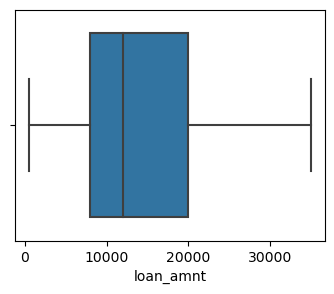

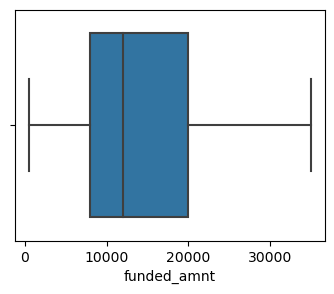

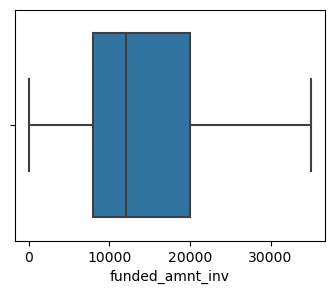

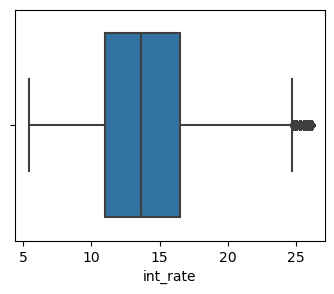

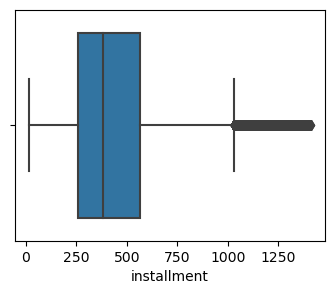

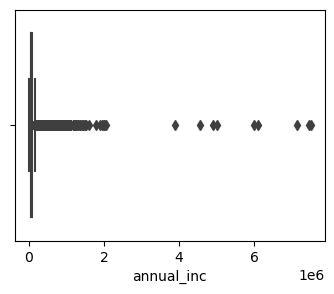

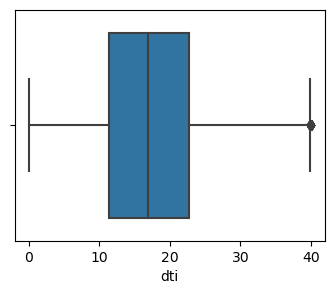

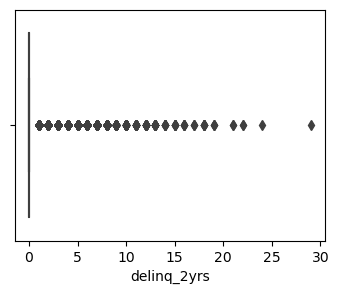

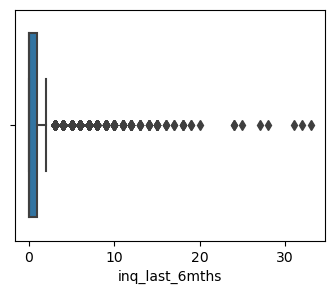

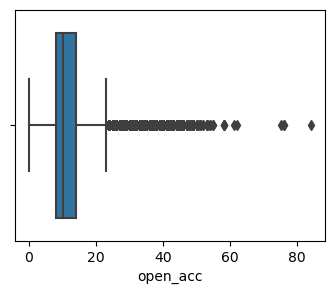

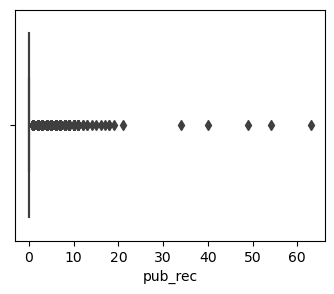

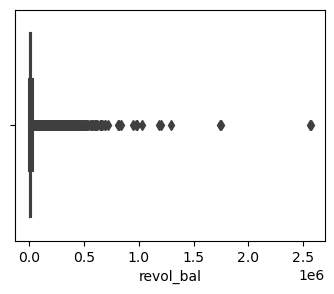

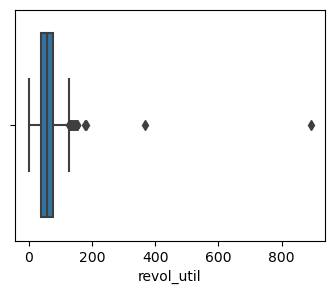

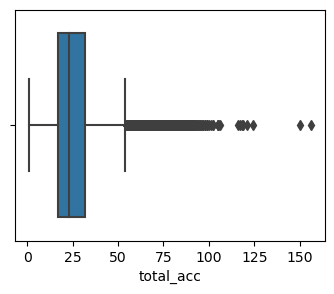

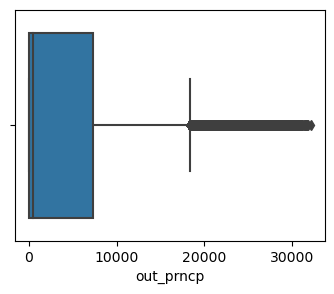

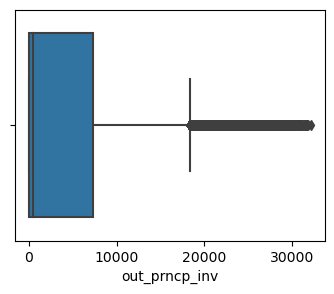

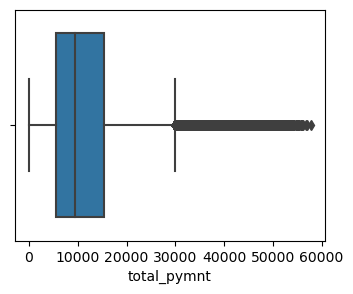

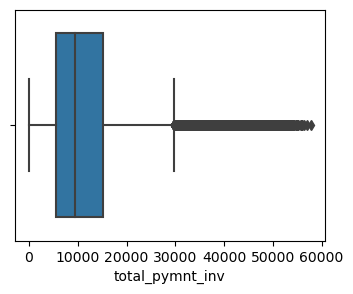

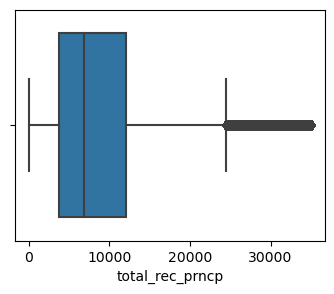

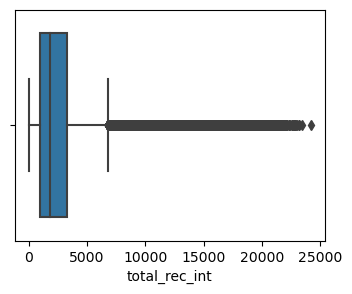

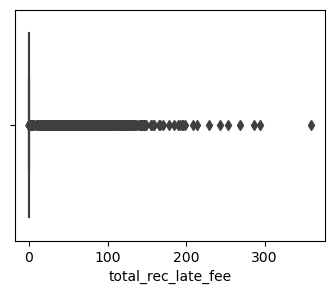

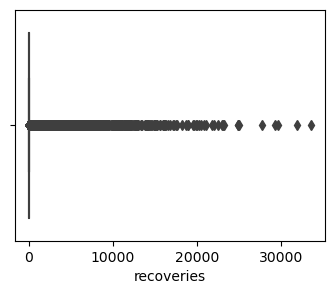

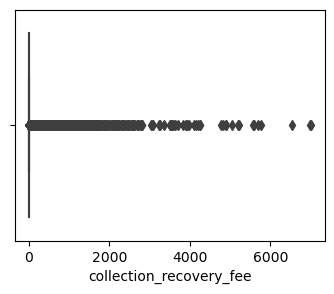

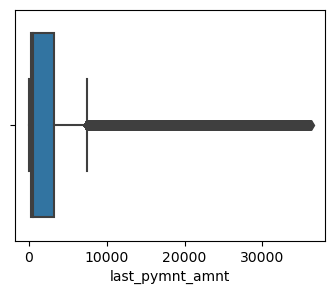

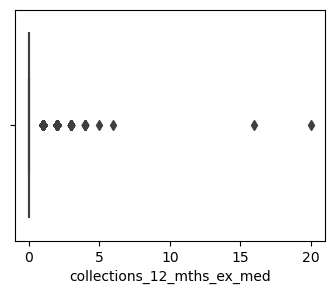

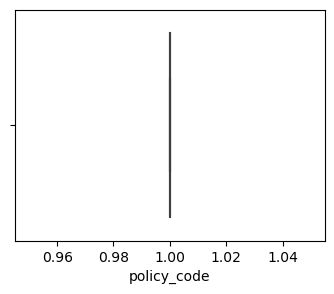

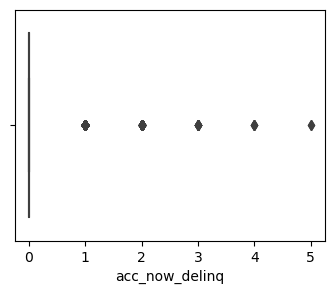

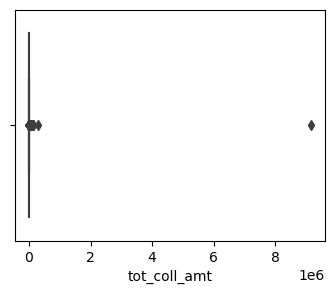

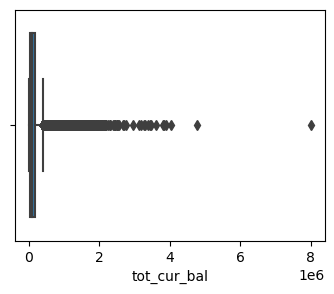

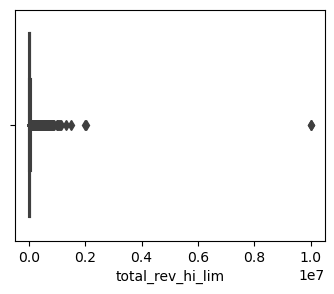

In [42]:
from pandas.api.types import is_numeric_dtype

for col in loan_df.iloc[:,3:]:
    if is_numeric_dtype(loan_df[col]):
        plt.figure(figsize=(4, 3))
        sns.boxplot(data = loan_df, x = col)
        plt.show();
        # Consigo colocar um do lado do outro?
        
# The upper and lower limits are the IQR -> past them, everything is an outlier
# Cols:
# 'total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs'(tem mt zero... oq fazer?)
# , 'inq_last_6mths', 'open_acc', 'pub_rec'
# , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
# , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med'
# , 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

# Fazer Robust Scaler nessas variáveis acima (outliers)
# RobustScaler = (x - median)/IQR


# Colunas esquisitas: 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'pub_rec' --> considerar OHE nessas

In [40]:
# Tests
loan_df['acc_now_delinq'].unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

In [ ]:
# Implementar Robust Scaler
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

# rb_scaler = RobustScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

columns_to_robust = ['total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti'
    , 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# rb_scaler.fit(loan_df[columns_to_robust]) 

# # 2-Scale/Transform
# # <-> apply the transformation (value - median) / IQR for every house

# loan_df[[columns_to_robust]] = rb_scaler.transform(loan_df[[columns_to_robust]]) 

# loan_df.head()

## Categorical Features

In [ ]:
#### Balancear o dataset?
# Balancing strategies
# Oversampling of minority class
# Alternatively, Computation of new instances for the minority class
# Undersampling of majority class

# Use balancing techniques only on the training set to help the model learn about the minority class.
# The test set should remain representative of the real word.

### SMOTE?

### Encodings
# Ordinal Encoder -> se tiver lógica crescente entre as categorias
# One Hot Encoder -> se NÃO tiver lógica crescente entre as categorias


In [35]:
loan_df['loan_status'].value_counts(dropna = False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [74]:
# Good/ Bad Definition
loan_df['good_bad'] = np.where(loan_df['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [37]:
loan_df['good_bad'].value_counts(dropna = False)

1    415317
0     50968
Name: good_bad, dtype: int64

In [44]:
round((loan_df['good_bad'] == 0).sum()/len(loan_df), 2)

0.11

## Preprocessing Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OridnalEncoder
from sklearn.preprocessing import OneHotEncoder


# Impute then scale numerical values: 
# Features with no outliers
standard_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())
])

# Features with outliers
robust_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('robust_scaler', RobustScaler())
])

# Encode categorical values
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('standard_scaler', standard_transformer, columns_to_standardize), # para todas as colunas numéricas
    ('roubst_scaler', robust_transformer, columns_to_robust),
    ('cat_transformer', cat_transformer, columns_to_category)
])

In [ ]:
 # Visualizing Pipelines in HTML
from sklearn import set_config; set_config(display='diagram')
preprocessor

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

pd.DataFrame(
    X_train_transformed, 
    columns=preprocessor.get_feature_names_out()
).head()

In [ ]:
# Full preprocessing pipeline
from sklearn.compose import make_column_selector

num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough'
)

preproc_full = make_union(preproc_basic, bmi_age_ratio_constructor)

preproc_full